In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset
train_generator = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/capstone project',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
model.fit(train_generator, epochs=epochs)

# Save the model
model.save('stock_candle_ai_model.h5')

Found 16 images belonging to 2 classes.
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6985 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 4.8660 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 2.6431 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 1.3087 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.7193 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.6975 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.7007 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 0.6930 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.6977 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 0.6917 - accuracy: 0.5000
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 107ms/step


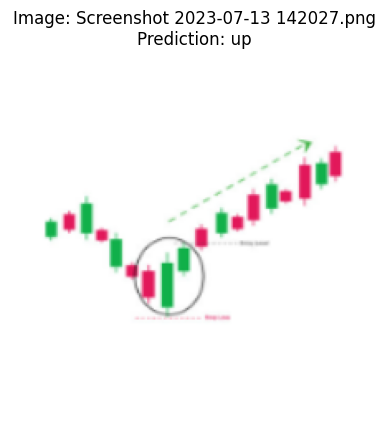

1/1 [==============================] - 0s 34ms/step


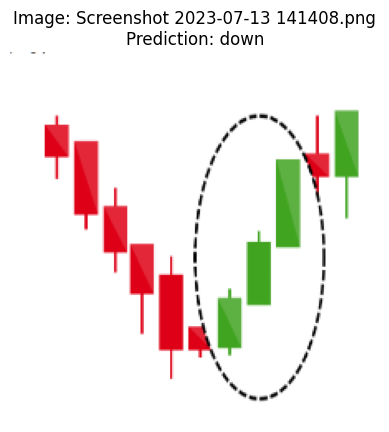

1/1 [==============================] - 0s 34ms/step


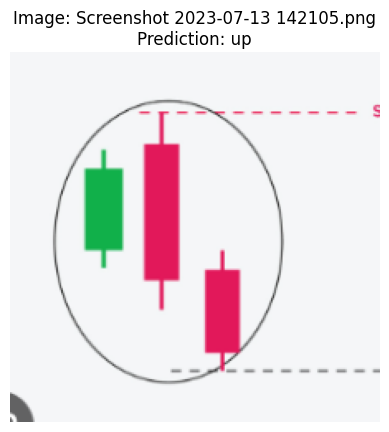

1/1 [==============================] - 0s 35ms/step


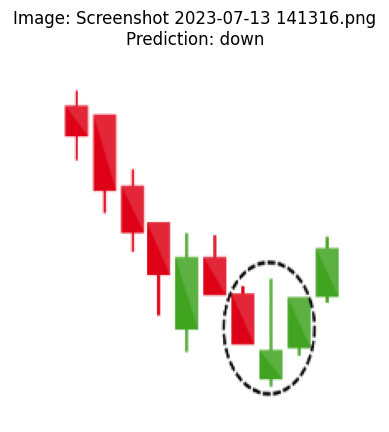

1/1 [==============================] - 0s 33ms/step


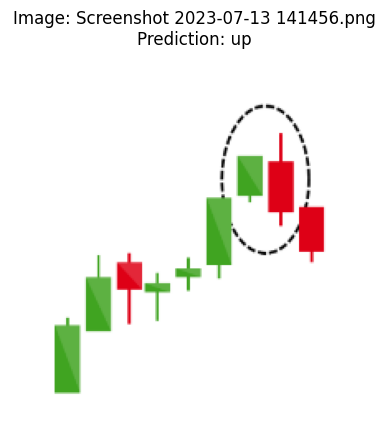

1/1 [==============================] - 0s 35ms/step


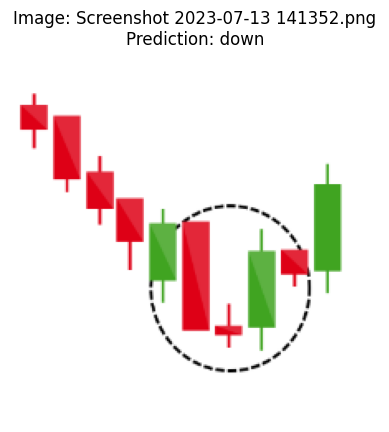

1/1 [==============================] - 0s 34ms/step


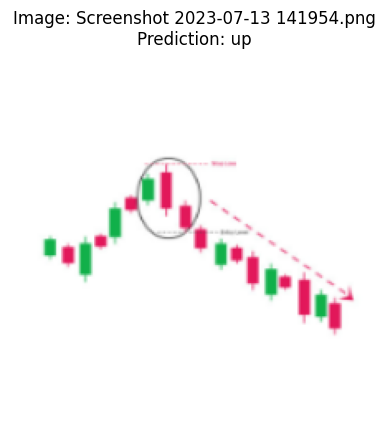

1/1 [==============================] - 0s 35ms/step


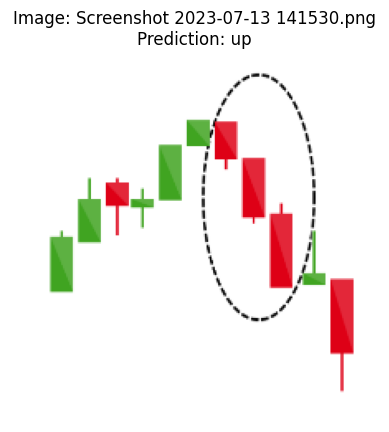

1/1 [==============================] - 0s 48ms/step


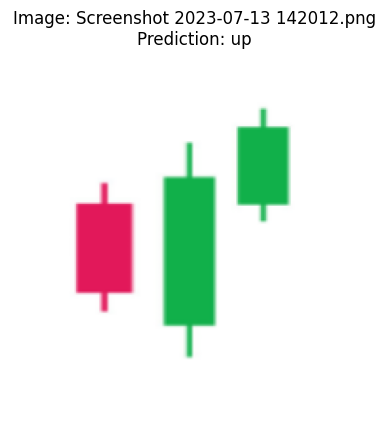

1/1 [==============================] - 0s 53ms/step


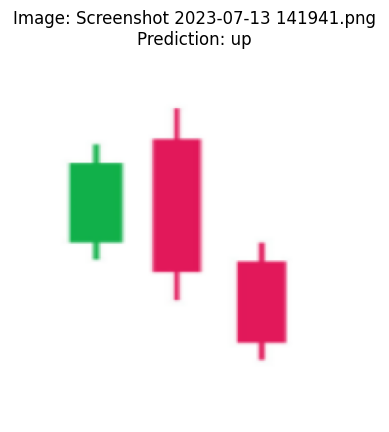

1/1 [==============================] - 0s 48ms/step


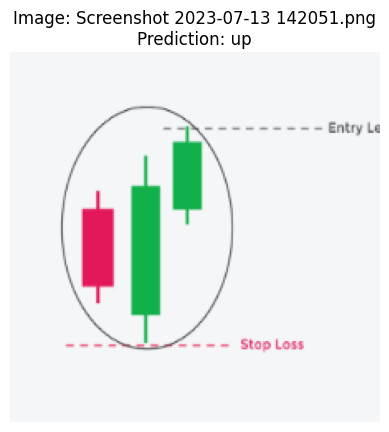

1/1 [==============================] - 0s 51ms/step


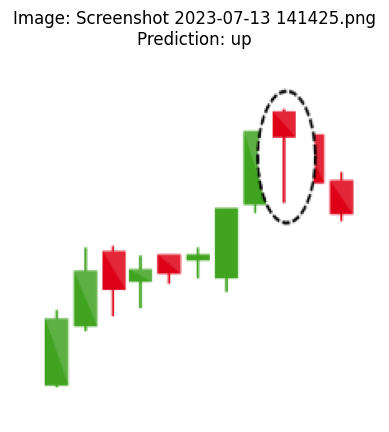

1/1 [==============================] - 0s 51ms/step


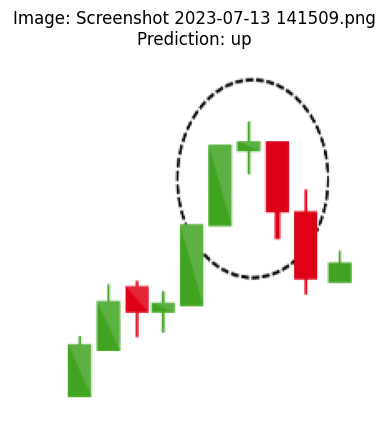

1/1 [==============================] - 0s 50ms/step


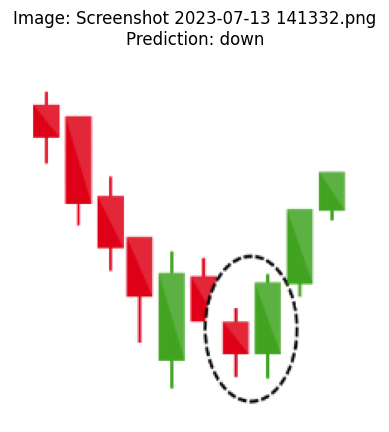

1/1 [==============================] - 0s 36ms/step


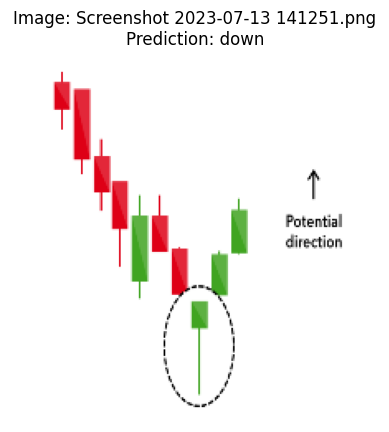

1/1 [==============================] - 0s 44ms/step


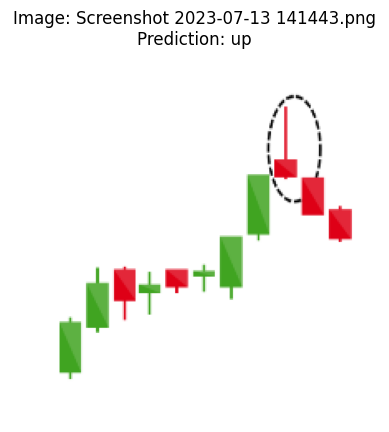

In [3]:
import os
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('stock_candle_ai_model.h5')  # Load your model file

# Define the path to the input images directory
input_directory = '/content/drive/MyDrive/input'  # Replace with the path to your "input" directory

# List the files in the input directory
input_images = os.listdir(input_directory)

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Adjust the size to match your model input size
    img = np.expand_dims(img, axis=0)  # Add a batch dimension

    # Predict using the model
    prediction = model.predict(img)

    # Classify as "up" or "down" based on the prediction
    if prediction > 0.5:
        result = "up"
    else:
        result = "down"

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()


In [8]:
### CIFAR Implementation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the parameters
input_shape = (32, 32, 3)  # Modify to match CIFAR-10 image size
batch_size = 32
epochs = 20

# Create a CNN model for CIFAR-10
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two classes: "up" and "down"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset (CIFAR-10)
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (_, _) = cifar10.load_data()

# Filter the CIFAR-10 dataset to retain only "up" and "down" classes
# You need to have these classes pre-defined in your dataset
up_class = 0
down_class = 1

up_images = train_images[train_labels[:, 0] == up_class]
down_images = train_images[train_labels[:, 0] == down_class]

up_labels = train_labels[train_labels[:, 0] == up_class]
down_labels = train_labels[train_labels[:, 0] == down_class]

# Combine the "up" and "down" classes
filtered_images = np.vstack((up_images, down_images))
filtered_labels = np.concatenate((up_labels, down_labels))

# Resize the images to match the input size (32x32)
filtered_images_resized = np.array([cv2.resize(img, (32, 32)) for img in filtered_images])

train_generator = train_data_gen.flow(filtered_images_resized, filtered_labels, batch_size=batch_size)

# Train the model
model.fit(train_generator, epochs=epochs)

# Save the fine-tuned model
model.save('fine_tuned_stock_candle_ai_model.h5')

# Rest of your code to make predictions on input images (already provided in previous responses)


Epoch 1/20
313/313 [==============================] - 13s 38ms/step - loss: 0.4978 - accuracy: 0.4836
Epoch 2/20
313/313 [==============================] - 13s 43ms/step - loss: 0.3691 - accuracy: 0.4976
Epoch 3/20
313/313 [==============================] - 12s 39ms/step - loss: 0.3281 - accuracy: 0.4952
Epoch 4/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2931 - accuracy: 0.4942
Epoch 5/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2689 - accuracy: 0.4961
Epoch 6/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2520 - accuracy: 0.4967
Epoch 7/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2378 - accuracy: 0.4945
Epoch 8/20
313/313 [==============================] - 12s 38ms/step - loss: 0.2366 - accuracy: 0.4985
Epoch 9/20
313/313 [==============================] - 12s 38ms/step - loss: 0.2181 - accuracy: 0.4990
Epoch 10/20
313/313 [==============================] - 12s 38ms/step - loss: 0.202

1/1 [==============================] - 0s 299ms/step


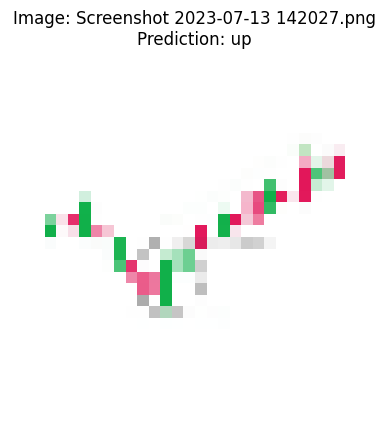

1/1 [==============================] - 0s 18ms/step


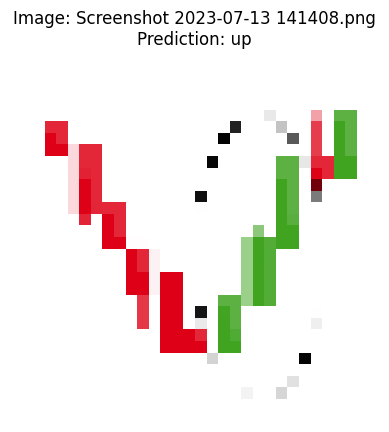

1/1 [==============================] - 0s 19ms/step


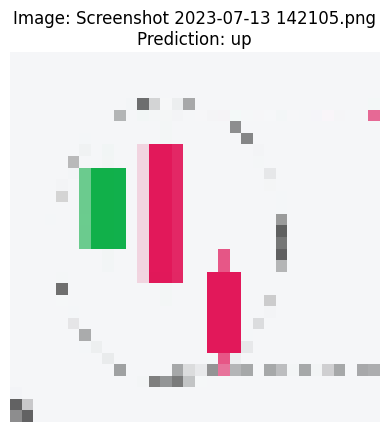

1/1 [==============================] - 0s 19ms/step


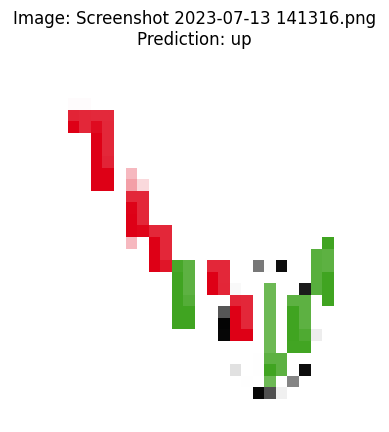

1/1 [==============================] - 0s 20ms/step


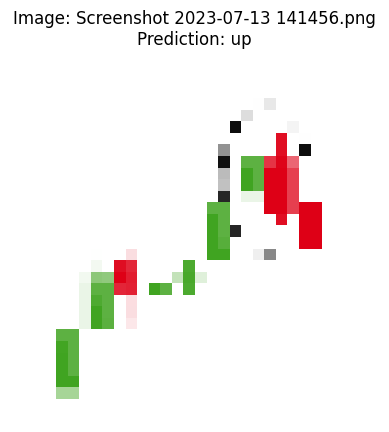

1/1 [==============================] - 0s 19ms/step


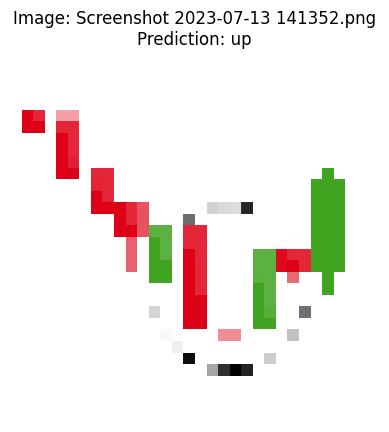

1/1 [==============================] - 0s 18ms/step


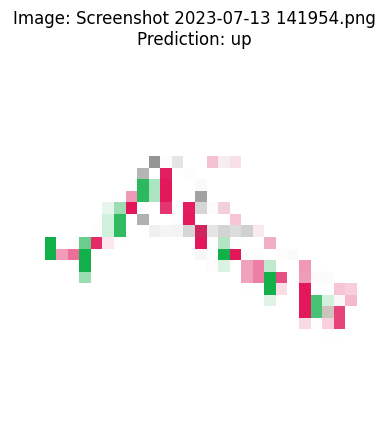

1/1 [==============================] - 0s 19ms/step


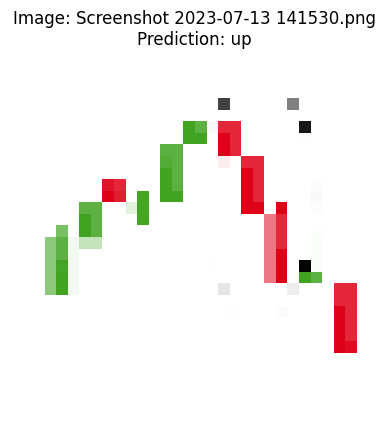

1/1 [==============================] - 0s 19ms/step


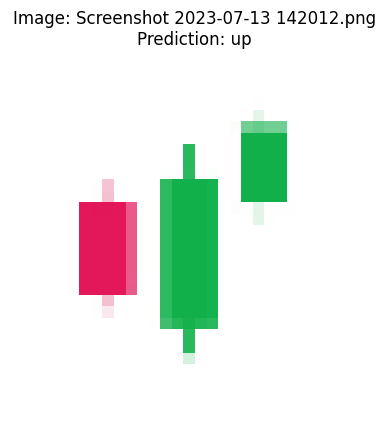

1/1 [==============================] - 0s 18ms/step


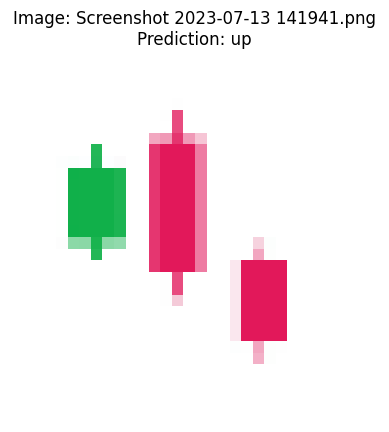

1/1 [==============================] - 0s 22ms/step


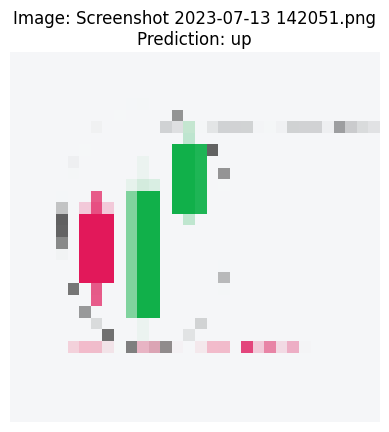

1/1 [==============================] - 0s 18ms/step


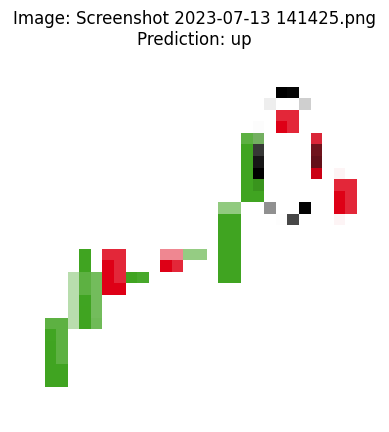

1/1 [==============================] - 0s 25ms/step


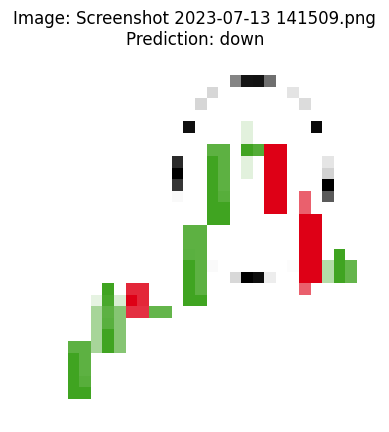

1/1 [==============================] - 0s 17ms/step


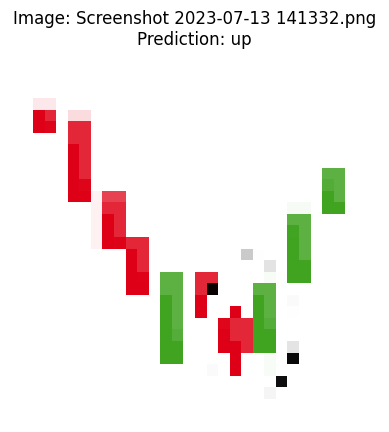

1/1 [==============================] - 0s 17ms/step


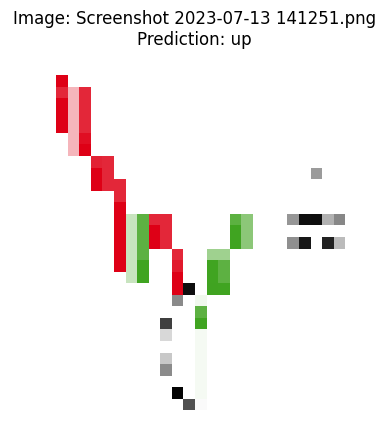

1/1 [==============================] - 0s 22ms/step


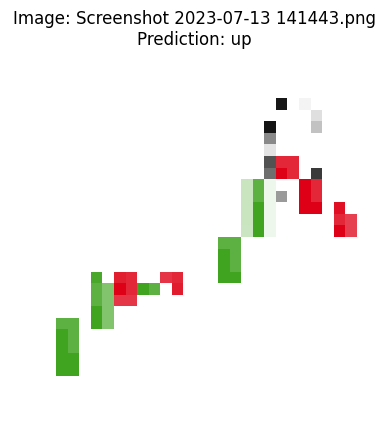

In [9]:
import os
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the fine-tuned model
model = keras.models.load_model('fine_tuned_stock_candle_ai_model.h5')  # Load your fine-tuned model file

# Define the path to the input images directory
input_directory = '/content/drive/MyDrive/input'  # Replace with the path to your "input" directory

# List the files in the input directory
input_images = os.listdir(input_directory)

# Map class indices to class names
class_names = {0: "up", 1: "down"}

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  # Adjust the size to match your fine-tuned model input size
    img = np.expand_dims(img, axis=0)  # Add a batch dimension

    # Predict using the fine-tuned model
    prediction = model.predict(img)

    # Classify as "up" or "down" based on the prediction
    class_index = np.argmax(prediction)
    result = class_names[class_index]

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()
